# Compare mdtest performance

In [2]:
import re
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
sns.set_context("paper")

In [3]:
def getperf(filename):
    infile = open(filename, 'r')
    create = -1.0
    stat = -1.0
    remove = -1.0
    for line in infile:
        if re.search('File creation', line):
            line = line.strip()
            tokens = line.split()
            create = float(tokens[5])
        elif re.search('File stat', line):
            line = line.strip()
            tokens = line.split()
            stat = float(tokens[5])
        elif re.search('File removal', line):
            line = line.strip()
            tokens = line.split()
            remove = float(tokens[5])   
    infile.close()
    
    return create, stat, remove

In [4]:
def calcperf(filedict, test, cpn):
    coreslist = []
    createlist = []
    statlist = []
    removelist = []
    print "{:>15s} {:>15s} {:>15s} {:>15s} {:>15s}".format('Nodes', 'Cores', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)')
    print "{:>15s} {:>15s} {:>15s} {:>15s} {:>15s}".format('=====', '=====', '==============', '============', '==============')
    for nodes, filename in sorted(filedict.items()):
        coreslist.append(nodes*cpn)
        fullname = filename.format(test)
        create, stat, remove = getperf(fullname)
        createlist.append(create)
        statlist.append(stat)
        removelist.append(remove)
        print "{:>15d} {:>15d} {:>15.3f} {:>15.3f} {:>15.3f}".format(nodes, nodes*cpn, create, stat, remove)
    return coreslist, createlist, statlist, removelist

In [27]:
cpn = {}
cores = {}
create = {}
stat = {}
remove = {}
sty = {}
systems = ['Cirrus','ARCHER','CSD3-Skylake']

## Multiple processes creating files in single directory

In [36]:
test = 'mp-mf-sd'

In [28]:
cir_files = {2:'../results/Cirrus/mdtest_{0}_1048576_2nodes_201711231231.log',
             4:'../results/Cirrus/mdtest_{0}_1048576_4nodes_201711231340.log',
             8:'../results/Cirrus/mdtest_{0}_1048576_8nodes_201711231400.log',
             16:'../results/Cirrus/mdtest_{0}_1048576_16nodes_201711231416.log',
             32:'../results/Cirrus/mdtest_{0}_1048576_32nodes_201711231427.log',
             64:'../results/Cirrus/mdtest_{0}_1048576_64nodes_201711231434.log',}

In [37]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72       10372.759       15338.753        7840.810
              4             144       20551.523       35219.239       10540.914
              8             288       36822.492       68579.723       18643.787
             16             576       45697.953      117750.326       27914.636
             32            1152       35363.762      152163.513       32398.233
             64            2304       40631.075      161379.650       32641.428


In [8]:
arc_files = {2:'../results/ARCHER/mdtest_{0}_1048576_2nodes_201711250820.log',
             4:'../results/ARCHER/mdtest_{0}_1048576_4nodes_201711241001.log',
             8:'../results/ARCHER/mdtest_{0}_1048576_8nodes_201711232038.log',
             16:'../results/ARCHER/mdtest_{0}_1048576_16nodes_201711241108.log',
             32:'../results/ARCHER/mdtest_{0}_1048576_32nodes_201711241600.log',
             64:'../results/ARCHER/mdtest_{0}_1048576_64nodes_201711242301.log',}

In [38]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 24
sty[sys] = 's-'
cores[key], create[key], stat[key], remove[key] = calcperf(arc_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              48        4681.425        6508.458        1571.340
              4              96        8078.051        9034.181        2478.424
              8             192        8391.703       18867.906        2805.547
             16             384       12941.012       19603.802        3133.693
             32             768        5581.860       16226.720        2579.830
             64            1536       12363.501       20804.285        4368.109


In [10]:
csd3s_files = {2:'../results/CSD3Skylake/mdtest_{0}_1048576_2nodes_201711281530.log',
               4:'../results/CSD3Skylake/mdtest_{0}_1048576_4nodes_201711281506.log',
               8:'../results/CSD3Skylake/mdtest_{0}_1048576_8nodes_201711281428.log',
               16:'../results/CSD3Skylake/mdtest_{0}_1048576_16nodes_201711281628.log',
               32:'../results/CSD3Skylake/mdtest_{0}_1048576_32nodes_201711281514.log'
              }

In [39]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 32
sty[sys] = 'o-'
cores[key], create[key], stat[key], remove[key] = calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       10447.905       15785.713        7996.072
              4             128       21623.942       28257.865        8869.195
              8             256       40588.567       65347.554       18597.795
             16             512       54151.757      116107.385       31821.267
             32            1024       43346.112      142800.723       37725.149


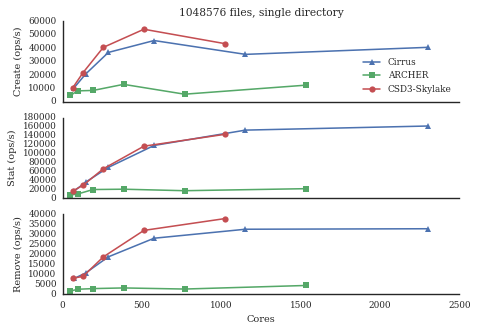

In [40]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1048576 files, single directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)
plt.savefig("mdtest_mp-mf-sd.png", dpi=300)


In [41]:
print "Maximum performance:"
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)')
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '==============')
for system in systems:
    key = '{0},{1}'.format(system, test)
    print "{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key]))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       45697.953      161379.650       32641.428
         ARCHER       12941.012       20804.285        4368.109
   CSD3-Skylake       54151.757      142800.723       37725.149


## Multiple processes creating files in multiple directories

In [42]:
test = 'mp-mf-md'

In [43]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72       12978.440      148081.027        8529.599
              4             144       24672.351      160014.067       15644.586
              8             288       38695.939      144716.291       24817.168
             16             576       53810.573      156742.952       31643.325
             32            1152       51713.201      142344.017       30412.522
             64            2304       54892.671      149576.243       31252.979


In [44]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(arc_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        4878.045        7665.408        1993.050
              4             144        8893.743       17464.946        3119.114
              8             288        9633.525       27970.244        3510.650
             16             576       14062.439       18519.501        3731.414
             32            1152        6247.791       10757.108        2424.931
             64            2304       11901.056       26540.730        4929.176


In [45]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72       26640.390      137201.081       25408.338
              4             144       43342.066      152180.682       29893.034
              8             288       62296.105      228447.780       39188.278
             16             576       62948.188      174903.377       35492.293
             32            1152       59117.056      171432.169       38115.906


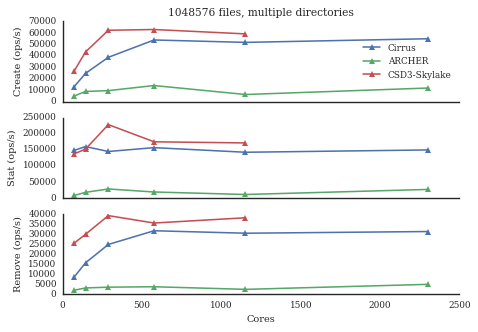

In [46]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1048576 files, multiple directories')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)
plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [47]:
print "Maximum performance:"
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)')
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '==============')
for system in systems:
    key = '{0},{1}'.format(system, test)
    print "{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key]))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       54892.671      160014.067       31643.325
         ARCHER       14062.439       27970.244        4929.176
   CSD3-Skylake       62948.188      228447.780       39188.278


## Multiple processes creating single file in single directory

In [48]:
test = 'mp-sf-sd'

In [49]:
sys = 'Cirrus'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(cir_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        8975.731       70350.098      144360.022
              4             144       15472.888       88224.553      251992.302
              8             288       18145.475       62330.264      432280.133
             16             576       18056.868       40375.868      479889.082
             32            1152       26907.952       99330.674      420896.807
             64            2304       24478.360       96213.006      463599.634


In [50]:
sys = 'ARCHER'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(arc_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        3959.381       52634.403       77792.346
              4             144        9385.199       89062.859      161643.189
              8             288       14784.130      193722.966      309733.218
             16             576       17188.853      338648.599      358870.930
             32            1152       23608.234      330043.593      317612.450
             64            2304       18955.521      641614.475     1008523.942


In [51]:
sys = 'CSD3-Skylake'
key = '{0},{1}'.format(sys, test)
cpn[sys] = 36
sty[sys] = '^-'
cores[key], create[key], stat[key], remove[key] = calcperf(csd3s_files, test, cpn[sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              72        2323.654         286.733      124275.674
              4             144       17713.835       81430.443      400052.841
              8             288       25129.700      141059.094      556631.324
             16             576       37160.768      179645.612      866270.128
             32            1152       38193.443      177316.790      599939.558


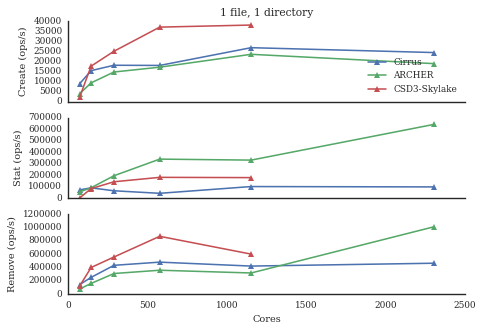

In [52]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], label=system)
plt.title('1 file, 1 directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)
plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [53]:
print "Maximum performance:"
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)')
print "{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '==============')
for system in systems:
    key = '{0},{1}'.format(system, test)
    print "{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key]))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         Cirrus       26907.952       99330.674      479889.082
         ARCHER       23608.234      641614.475     1008523.942
   CSD3-Skylake       38193.443      179645.612      866270.128
